<!-- dom:TITLE: Python leter etter nullpunkter   -->
# Å løse ikke linære linkninger- Python leter etter nullpunkter
<!-- dom:AUTHOR: A. Schmeding -->
<!-- Author: -->  
**Alexander Schmeding**

Date: **Apr, 2022**

# Innledning

Dere har lært hvordan man løser lineære likningssystemer, dvs. likninger med ukjennte $x,y,z,...$ som ser ut som for eksempel 
$$a x + b y + c z = 1 $$
$$d x + e y + f z = 2 $$
$$g x + h y + j z = 3 $$
I dag skal vi se nå på problemene som oppstår når vi skal løse **ikke lineære** likninger, dvs. likninger som ser ut som
$$\sin(x)+3x-24x^2 = 12$$
eller $$x^2+5x^{42}=12$$

### Å løse ikke lineære likninger eller å finne nullpunkter?

Først skal vi omdanne problemet litt. Vi skal først se at istedet av å løse likninger, vi kan også lete etter nullpunkter til (ikke lineær) funksjoner.
For dette ta en titt på følgende utregninger og gi en forklaring av utsag  
**Istedet av å løse en likning kan vi alltid omdanne problemen til å finne nullpunkter til noen funksjon**

*Utregninger*:
$$x \text{ løser likningen } x^2+5x^{42}=12 \text{ hvis og bare hvis } x^2+5x^{42}+12=0$$
Dermed kan vi si at $x$ er en løsning til den ikke lineær likning $x^2+5x^{42}=12$ hvis og bare hvis $x$ er **nullpunkt** til funksjonen $f(x) = x^2 + 5x^{42}-12$. (Husk at et nullpunkt av den funksjon $f$ er en $x$ slik at $f(x)=0$.) 

**Plass for dine notater**

Vi skal lære å programmere men for dette trenger vi noen problemer vi er (kanskje) interessert i og som kan løses ved bruk av datamaskinen. Vi skal bruke programmvare for å finne oss nullpunkter til en funksjon.
Å finne nullpunkter til funksjoner er viktig i mange ingeniørapplikasjoner som signalbehandling og optimalisering. For enkle funksjoner som f.eks. 
$$f(x) = ax^2+bx+c$$
kan vi løse problemen ved bruk av eksplisite formeler som den 'abc'-formel
$$x_{\ast} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$
som gir $x_\ast$, de to nullpunkter til $f$ nøyaktig. Men for mer kompliserte funksjoner kan nullpunkter sjelden beregnes med slike eksplisitte eller eksakte midler.

#### Spørsmål:
1. Hvor mange nullpunkter kan vi forvente av en andregradsfunksjon? Kan vi se fra abc-formel hvor mange det blir?
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Function_ax%5E2.svg/1920px-Function_ax%5E2.svg.png" width="500" align="center" />
2. Hvordan finner dere nullpunkter for mer kompliserte funksjoner, f.eks. for funksjoner som $$ax^3 + bx^2 + cx+d$$
<img src="http://www.matematicasvisuales.com/images/analysis/derivative/cubic/cubic1.jpg" width="500" align="center" />
eller $ax^6+bx^5+cx^4 + dx^3+ex^2+fx+g$?

# Nullpunkter til en funksjon

Husk at en punkt $x_0$ heter **nullpunkt** av en funksjon $f$ hvis $f(x_0)=0$. Med andre ord:

**Nullpunkter er de steder hvor grafen til funksjonen krysser eller tangerer $x$-aksen**

For funksjoner som $f(x)=x^2−9$ er nullpunktene klart $3$ og $−3$. Vi har faktisk alrede lært en metode for å finne dem (det var Heron's metode).

For andre funksjoner som $g(x)=\sin(x)−x$ kan det imidlertid være vanskelig å bestemme en analytisk eller eksakt løsning for nullpunkter til funksjoner. For disse tilfellene kan vi bruke datamaskinen for å finne oss nullpunkter. Den den iden er å skape numeriske tilnærminger av nullpunkter til $f$ og forstå begrensningene ved å gjøre det.

Igjen vi minner om at datamaskinen leter etter tilnærminger til nullpunkter vi vil vanligvis ikke få et eksakt nullpunkt. Uansett er vi fornøyd med en tilnærming som er *god nok*. 

Vi skal lære nå om en allmen metode for å finne nullpunkter til en funksjon som funker for funksjoner som ikke "springer rundt", dvs. funksjoner du kan tegne den uten å løfte hånda fra papiret (disse funksjoner heter *kontinuerlig* men vi skal ikke forklare i kurset hvordan man ser tydelig på det. Hvis du ville vite mer se på [Artikkel om Kontinuitet](https://www.matematikk.org/artikkel.html?tid=155135&within_tid=155133)).

Tipp for tredjegradspolynomer vil dere kanskje se på: [Wikipedia om Cardano formel](https://en.wikipedia.org/wiki/Cubic_equation).

**Plass for dine notater**

## Intervallhalveringsmetoden

Utgangspunkt av metoden er en observasjon vi tar på grafen:
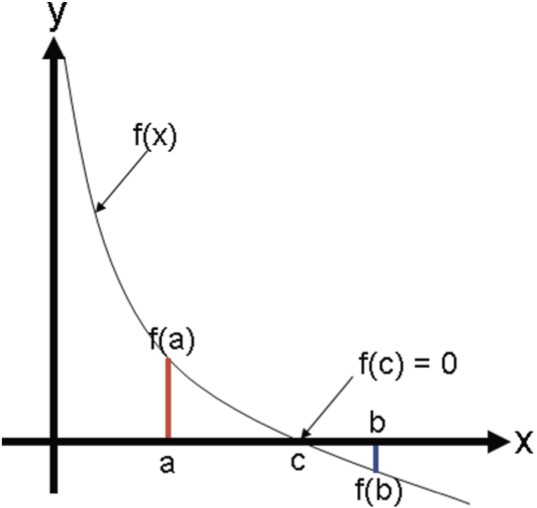
Vi ser på grafen av en funksjon som har en nullpunkt $c$ på et intervall $[a,b]$. 

For den interval vi har valgt, funksjonen $f$ bytter fortegn, dvs. $f(a) > 0$ mens $f(b) < 0$. 
Merk at vi kan alltid finne en slik intervall hvis funksjonen er ikke "for vild" og krysser $x$-aksen i nullpunkten.

#### Omvendt spørsmål: Kan vi si noe hvis vi har funnet et intervall $[a,b]$ slik at $f(a) > 0 > f(b)$ eller $f(a)<0<f(b)$?

Som et eksempel ser vi nå på funksjonen $f(x) = (x-2,5)\cdot e^{-0,5\cdot (x-2)^2}+0,2$:

In [ ]:
# Vi lager grafen til et eksempel (Husk at vi må laste inn noen biblioteker)
from math import * 
from numpy import * 
from matplotlib.pyplot import *   

# De neste linjene setter parametre for plotting. 
# Parameterne her kan gjerne endres
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

#Nå kommer funksjonen 
f = lambda x : (x-2.5)*exp(-0.5*(x-2)**2)+0.2

x = linspace(-2,6,400)
plot(x,f(x))


Merk: Det er ikke nødvendig at funksjonen bytter fortegn på grensen til et intervall for at det fins en nullpunkt i intervallet (f.eks. $[-2,3]$ har en nullpunkt for funksjonen $f$ vi har sett på, mens $f(-2)>0$ og $f(3)>0$).

Uansett: Hvis funksjonen har forskjellige fortegn i randpunktene til et intervall kan vi være sikkert at det må finnes en nullpunkt i intervallet.

Eksempel: $[-1,0]$ og $[2,3]$ oppfyller begge to kravet at funksjonen $f$ har forskjellige fortegn!

In [ ]:
print(f(-1),f(0))
print(f(2),f(3))

Hvordan kan vi enkelt sjekke ved hjelp av Python hvis funksjonen har forskjellige fortegn på to punktene?
Det fins en Python funksjon som heter <code>sign</code>, som kan brukes for å sammenlikne fortegn, men det fins en enklere metode, la oss se på produktene av funskjonsverdier:

In [ ]:
#Vi lager en liten tabell med funskjonsverdier av f:

print ("Punkt a |", "f(a)                |", "Punkt b |", "f(b)                 |", "f(a)*f(b)")
print("-------------------------------------------------------------------------------------")
print(-2, "     |", f(-2), "|", 3,"      |", f(3), "  |", f(-2)*f(3))
print(-1, "     |", f(-1), "|", 0,"      |", f(0), "|", f(-1)*f(0))
print(2, "      |", f(2), "               |", 3,"      |", f(3), "  |", f(2)*f(3))

**Spørsmål**: Hva er forskjellen mellom produktene hvis $f(a)$ og $f(b)$ har samme eller forskjellige fortegn?

#### Ide for en algoritme som leter etter nullpunktene av $f$

Ingredienser (ting vi trenger på forhand): En funksjon $f$ og en tolerans $tol >0$

**Hva betyr den toleransen?** Vi aksepterer en punkt $x_\ast$ som en nullpunkt hvis $|f(x_\ast)|< tol$.

1. Finn et intervall $[a,b]$ hvor funksjonen har forskellige fortegn på randpunktene 
   Vi kan sjekke det enkelt ved produkten $f(a)\cdot f(b)$, siden $f(a)\cdot f(b) < 0$ bare hvis funksjonen har forskjellig fortegn i $a$ og $b$.

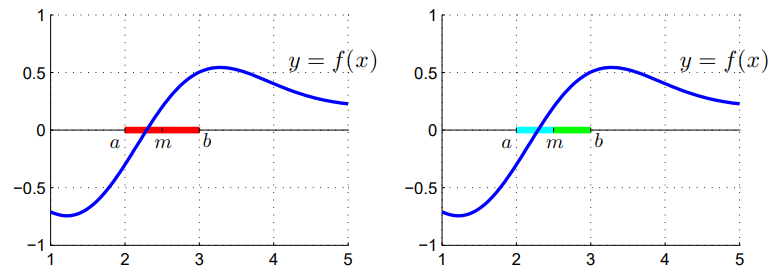

2. Del opp intervallet $[a,b]$ i to intervall $[a,m]$ og $[m,b]$ hvor $m$ er midtpunkt av intervallet.

**Spørsmål:** Hvordan kan vi skrive midtpunktet av $[a,b]$?   

$m = ??$

3. Vi sjekker hvis $f(a)$ og $f(m)$ har forskjellige fortegn. Hvis det er sant fortsetter vi med intervallet $[a,m]$ ellers tar vi $[m,b]$.
4. Gjenta 2. og 3. inntil vi har $|f(m)|<tol$.

Vi skal utfører planen nå og lage et Python funksjon (hvis du har ikke sett funksjonene i Python, JuPyter notat *PY0101No-3-3-Functions.ipynb* på Canvas har mer informasjon) som leter etter nullpunkter. 

In [ ]:
#Vi definerer en funksjon 
def intervallhalvering (f,a,b,tol):
    # Her lagrer vi en forklaring av funksjonen og det som skal skje
    # under fortsetter vi ved programkode
    
    return xstjerne

In [ ]:
# Vi tester funksjonen vår ved eksemplet vi har lagt så langt

nullpunkt1 = intervallhalvering(f,-1,0,0.01)
nullpunkt2 = intervallhalvering(f,2,3,0.01)

#Nå skriver vi ut resultatene vi har fått:
print("Skriv ut resultatene til intervallhalvering for funksjonen f=(x-2.5)*exp(-0.5*(x-2)^2)**2)-0.2")
print("Første nullpunkt til f i intervallet [-1,0] er ", nullpunkt1)
print("Andre nullpunkt til f i intervallet [2,3] er " nullpunkt2)

#Bare for å sjekke setter vi inn noen grenser som ikke oppfyller kravet
intervallhalvering(f,-2,3,0.01)

### Oppgave

Banen til en ball (uten luftmotstand og på overflaten av jorda) beskrives av funksjonen
$$y(x) = y_0 - \frac{9.81}{2v_0^2 (\cos (\theta))^2} \left(x-\frac{v_0^2\sin(2\theta)}{2\cdot 9.81} \right)^2 + \frac{(v_0\sin (\theta))^2}{2 \cdot 9.81}$$
hvor $y_0$ er starthøyde, $v_0$ er utkastfart og $\theta$ er utkastvinkeln

(a) Lag en funksjon i Python som beskriver $y(x)$ for $y_0 = 1.85$, $v_0 = 10 m/s$ og $\theta = 45^\circ$.

In [ ]:
#Skriv din kode under og kjør den ved trykk av SHIFT + ENTER
#Tips: Du kan bruke <<def funskjonsnavn argument : >> eller <<lambda>> skrivemåten

(b) bruk din funksjon <code>intervallhalvering</code> som vi har tidligere laget for å finne nullpunktet til den funksjon du laget i (a).

In [1]:
#Skriv din kode under og kjør den ved trykk av SHIFT + ENTER
#Tips: Det kunne være lurt å teste forskjellige verdier av a og b på forhand 
#(Python hjelper gjerne med utregning)